# EDA를 통한 데이터의 형태, 문장길이, 데이터 수, 결측치 등을 파악

In [21]:
!pip install seaborn
!pip install pyarrow

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

# 데이터 구조 파악
![img](data_info1.png)

In [99]:
from datasets import load_from_disk
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

# Arrow 파일 경로 설정
train_file_path = os.path.join(parent_dir, 'data', 'train_dataset')
test_file_path = os.path.join(parent_dir, 'data', 'test_dataset')
dataset = load_from_disk(train_file_path)
test_dataset=load_from_disk(test_file_path)

In [100]:
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]
test_dataset=test_dataset['validation']

train_df=pd.DataFrame(train_dataset)
valid_df=pd.DataFrame(valid_dataset)
test_df=pd.DataFrame(test_dataset)

print(f"Train length : {len(train_df)}")
print(f"Valid length : {len(valid_df)}")
print(f"Test length : {len(test_df)}")

Train length : 3952
Valid length : 240
Test length : 600


## 데이터의 형태

In [101]:
train_dataset[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [102]:
valid_dataset[0]

{'title': '전효숙',
 'context': '순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법시험에 합격하여 판사로 임용되었고 대법원 재판연구관, 수원지법 부장판사, 사법연수원 교수, 특허법원 부장판사 등을 거쳐 능력을 인정받았다. 2003년 최종영 대법원장의 지명으로 헌법재판소 재판관을 역임하였다.\\n\\n경제민주화위원회(위원장 장하성이 소액주주들을 대표해 한보철강 부실대출에 책임이 있는 이철수 전 제일은행장 등 임원 4명을 상대로 제기한 손해배상청구소송에서 서울지방법원 민사합의17부는 1998년 7월 24일에 "한보철강에 부실 대출하여 은행에 막대한 손해를 끼친 점이 인정된다"며 "원고가 배상을 청구한 400억원 전액을 은행에 배상하라"고 하면서 부실 경영인에 대한 최초의 배상 판결을 했다. \\n\\n2004년 10월 신행정수도의건설을위한특별조치법 위헌 확인 소송에서 9인의 재판관 중 유일하게 각하 견해를 내었다. 소수의견에서 전효숙 재판관은 다수견해의 문제점을 지적하면서 관습헌법 법리를 부정하였다. 전효숙 재판관은 서울대학교 근대법학교육 백주년 기념관에서 열린 강연에서, 국회가 고도의 정치적인 사안을 정치로 풀기보다는 헌법재판소에 무조건 맡겨서 해결하려는 자세는 헌법재판소에게 부담스럽다며 소회를 밝힌 바 있다.',
 'question': '처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?',
 'id': 'mrc-0-003264',
 'answers': {'answer_start': [284], 'text': ['한보철강']},
 'document_id': 9027,
 '__index_level_0__': 2146}

In [103]:
test_dataset[0]

{'question': "유령'은 어느 행성에서 지구로 왔는가?", 'id': 'mrc-1-000653'}

## context, question, answer에 대한 각각의 길이를 계산하여 추가

In [105]:
# 'answers_text' 열 추가
train_df['answers_text'] = train_df['answers'].apply(lambda x: x['text'][0])
# 'answers_text' 열 추가
valid_df['answers_text'] = valid_df['answers'].apply(lambda x: x['text'][0])

In [106]:
train_df['con_len'] = train_df['context'].apply(len)
train_df['qu_len'] = train_df['question'].apply(len)
train_df['ans_len'] = train_df['answers_text'].apply(len)


valid_df['con_len'] = valid_df['context'].apply(len)
valid_df['qu_len'] = valid_df['question'].apply(len)
valid_df['ans_len'] = valid_df['answers_text'].apply(len)


test_df['qu_len'] = test_df['question'].apply(len)

In [107]:
train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,answers_text,ans_len
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,862,32,하원,2
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,621,22,《경영의 실제》,8
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,850,30,백성,2
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,727,39,중국,2
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,609,26,4개,2


In [108]:
valid_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,answers_text,con_len,qu_len,ans_len
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146,한보철강,625,30,4
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106,1871년,964,36,5
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180,나뭇잎,611,31,3
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141,금대야,1391,24,3
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184,수평적 관계,608,34,6


In [109]:
test_df.head()

,question,id,qu_len
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653,21
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113,31
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191,39
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951,36
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272,26


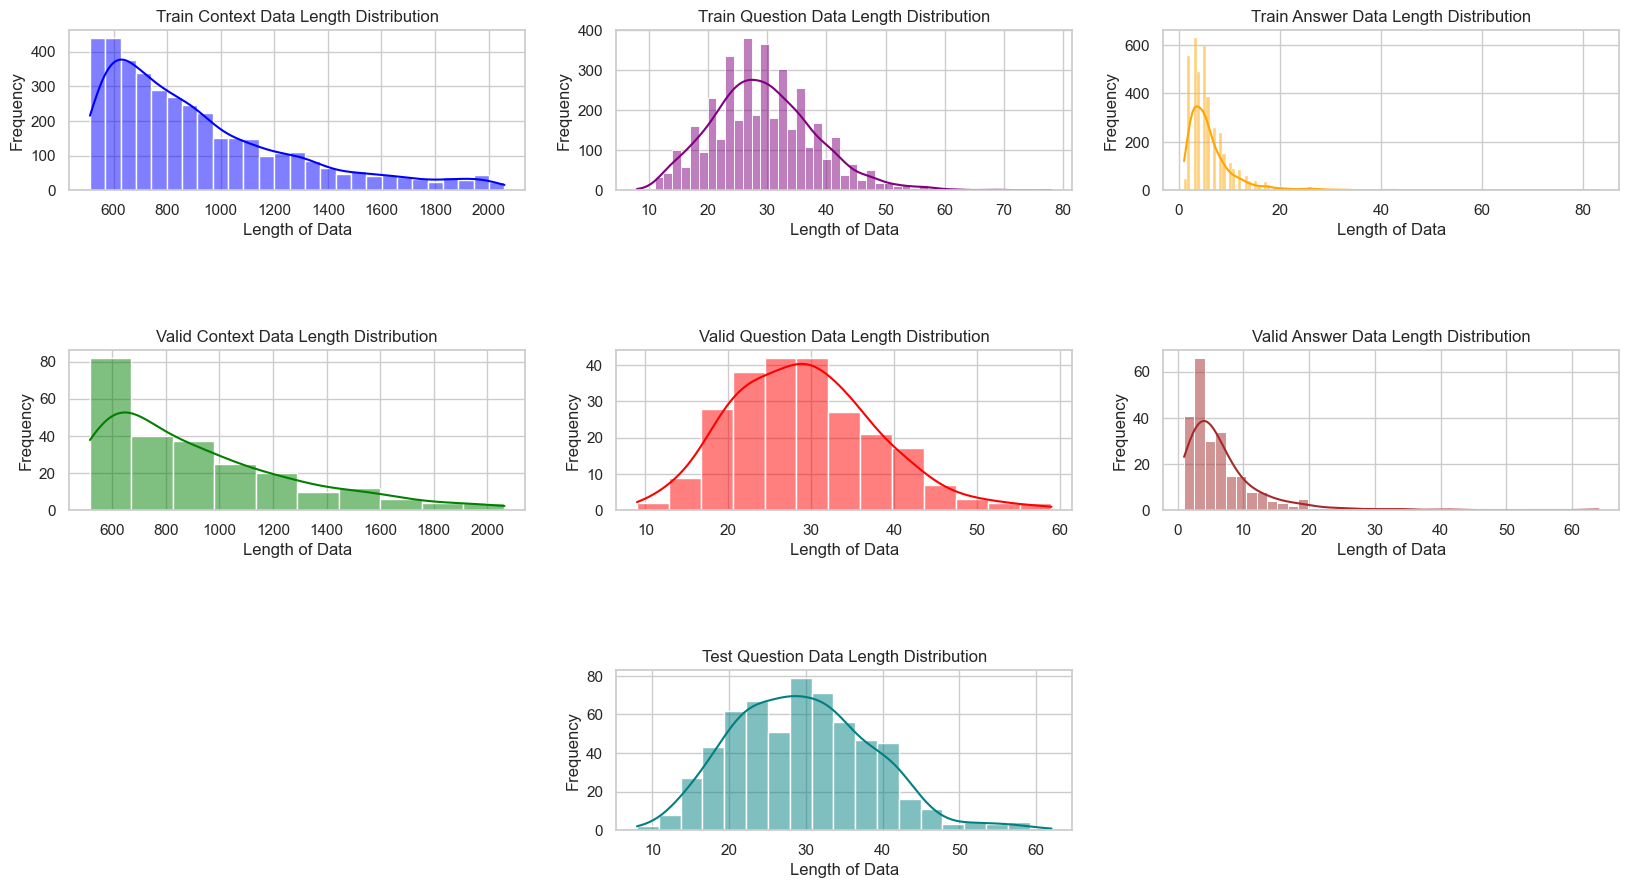

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정 (seaborn 기본 스타일 적용)
sns.set_theme(style="whitegrid")

# 그래프 크기 조정
plt.figure(figsize=(20, 10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

# 1. Train Context Data
plt.subplot(3, 3, 1)
sns.histplot(train_df["con_len"], kde=True, color='blue')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Train Context Data Length Distribution")

# 2. Train Question Data
plt.subplot(3, 3, 2)
sns.histplot(train_df["qu_len"], kde=True, color='purple')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Train Question Data Length Distribution")

# 3. Train Answer Data
plt.subplot(3, 3, 3)
sns.histplot(train_df["ans_len"], kde=True, color='orange')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Train Answer Data Length Distribution")

# 4. Valid Context Data
plt.subplot(3, 3, 4)
sns.histplot(valid_df["con_len"], kde=True, color='green')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Valid Context Data Length Distribution")

# 5. Valid Question Data
plt.subplot(3, 3, 5)
sns.histplot(valid_df["qu_len"], kde=True, color='red')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Valid Question Data Length Distribution")

# 6. Valid Answer Data
plt.subplot(3, 3, 6)
sns.histplot(valid_df["ans_len"], kde=True, color='brown')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Valid Answer Data Length Distribution")

# 7. Test Question Data
plt.subplot(3, 3, 8)
sns.histplot(test_df["qu_len"], kde=True, color='teal')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Test Question Data Length Distribution")

plt.show()


In [ ]:
# todo ans outlier check

## train, test, validation의 각각 con, question, ans의 길이 비교


In [111]:
# 각 데이터셋의 con_len, qu_len, ans_len을 합치기
combined_df = pd.DataFrame({
    'train_con_len': train_df["con_len"],
    'train_qu_len': train_df["qu_len"],
    'train_ans_len': train_df["ans_len"],
    'valid_con_len': valid_df["con_len"],
    'valid_qu_len': valid_df["qu_len"],
    'valid_ans_len': valid_df["ans_len"],
    'test_qu_len': test_df["qu_len"]
})

In [112]:
display(combined_df[["train_con_len","valid_con_len"]].describe())
display(combined_df[["train_qu_len","valid_qu_len","test_qu_len"]].describe())
display(combined_df[["train_ans_len","valid_ans_len"]].describe())

,train_con_len,valid_con_len
count,3952.000000,240.000000
mean,920.220648,916.725000
std,356.500514,360.032122
min,512.000000,517.000000
25%,645.000000,616.750000
50%,819.000000,820.500000
75%,1099.250000,1107.250000
max,2059.000000,2064.000000


,train_qu_len,valid_qu_len,test_qu_len
count,3952.000000,240.000000,600.000000
mean,29.322368,29.195833,29.555000
std,8.727421,8.728301,8.962376
min,8.000000,9.000000,8.000000
25%,23.000000,23.000000,23.000000
50%,29.000000,29.000000,29.000000
75%,35.000000,35.000000,35.000000
max,78.000000,59.000000,62.000000


,train_ans_len,valid_ans_len
count,3952.000000,240.000000
mean,6.275051,6.912500
std,5.346842,6.858755
min,1.000000,1.000000
25%,3.000000,3.000000
50%,5.000000,5.000000
75%,8.000000,8.000000
max,83.000000,64.000000


### train qusetion의 outlier가 좀 더 크다


## test_data의 question도 train,valid와 길이 거의 유사

#### 결측치 & 중복

In [114]:
# Train DataFrame 결측치 확인
print("Train DataFrame Missing Values:")
print(f"Context missing: {train_df['context'].isnull().sum()}")
print(f"Question missing: {train_df['question'].isnull().sum()}")
print(f"Answers missing: {train_df['answers_text'].isnull().sum()}")

# Valid DataFrame 결측치 확인
print("\nValid DataFrame Missing Values:")
print(f"Context missing: {valid_df['context'].isnull().sum()}")
print(f"Question missing: {valid_df['question'].isnull().sum()}")
print(f"Answers missing: {valid_df['answers_text'].isnull().sum()}")

# Test DataFrame 결측치 확인
print("\nTest DataFrame Missing Values:")
print(f"Question missing: {test_df['question'].isnull().sum()}")


Train DataFrame Missing Values:
Context missing: 0
Question missing: 0
Answers missing: 0

Valid DataFrame Missing Values:
Context missing: 0
Question missing: 0
Answers missing: 0

Test DataFrame Missing Values:
Question missing: 0


In [117]:
# Train DataFrame의 고유 값 개수 출력
print(f"Train DataFrame len: {len(train_df)}")
print(f"Unique contexts: {train_df['context'].nunique()}")
print(f"Unique questions: {train_df['question'].nunique()}")
print(f"Unique answers_text: {train_df['answers_text'].nunique()}")

# Valid DataFrame의 고유 값 개수 출력
print(f"\nValid DataFrame len: {len(valid_df)}")
print(f"Unique contexts: {valid_df['context'].nunique()}")
print(f"Unique questions: {valid_df['question'].nunique()}")
print(f"Unique answers_text: {valid_df['answers_text'].nunique()}")

# Test DataFrame의 고유 값 개수 출력 (answers는 없기 때문에 question만 계산)
print(f"\nTest DataFrame len: {len(test_df)}")
print(f"Unique questions: {test_df['question'].nunique()}")


Train DataFrame len: 3952
Unique contexts: 3340
Unique questions: 3952
Unique answers_text: 3622

Valid DataFrame len: 240
Unique contexts: 235
Unique questions: 240
Unique answers_text: 240

Test DataFrame len: 600
Unique questions: 600


### train set에서 유니크한 답변의 갯수가 적다?

In [127]:
# 중복된 'answers_text' 값을 가진 행들을 필터링하고, 'answers_text' 기준으로 정렬
duplicated_answers_text = train_df[train_df[['answers_text']].duplicated(keep=False)].sort_values('answers_text')

# 중복된 'answers_text' 값만 따로 추출 (중복된 값 리스트)
duplicated_values = train_df['answers_text'][train_df['answers_text'].duplicated()].unique()

# 중복된 값 출력
print("중복된 'answers_text' 값들:")
print(duplicated_values)

# 중복된 값을 포함한 모든 행 출력
display(duplicated_answers_text)


중복된 'answers_text' 값들:
['중국' '프랑스' '2004년' '화이트워터 사건' '일본' '1966년' '1578년' '이탈리아' '1962년'
 '포전 담당 책임제' '광동제약' '영국' '독일' '1945년' '미국' '2008년' '2015년' '1992년' '12년'
 '1995년' '북한' '윤보선' '1951년' '2006년' '3년' '1944년' '스페인' '2010년' '1916년'
 '히로시마 도요 카프' '1907년' '1990년' '다산 정약용' '현삼과' '1931년' '2017년' '러시아' '경찰'
 '상하이' '조선중앙일보' '교회' '3' '9월' '1919년' '근우회' '1948년' '1937년' '라틴어' '4개'
 '1927년' '1935년' '인도' '2007년' '2014년' '1999년' '발' '자장율사' '헤로인' '경원대군'
 '1982년' '2년' '인간' '명령형 프로그램' '영어' '8월 13일' '튜더 왕조 시대' '마오쩌둥' '일제시대'
 '공산주의' '5' '사슴' '1991년' '파리' '부산' '1946년' '율리우스 카이사르' '녹색' '홍준표' '이집트'
 '화살' '파즈르' '총리' '2005년' '병인박해' '동로마 황제 콘스탄스 2세' '여름' '마드리드' '《동아일보》'
 '레이프 에이릭손' '2001년' '이승만' '1994년' '학교' '1972년' '유금당' '근대철학' '알렉산드로스 대왕'
 '브뤼셀' '1978년' '제1기' '농업' '2012년' '남편' '사회주의' '페르시아' '1963년' '보리스 옐친 대통령'
 '정난정' '《황금어장 무릎팍도사》' '도널드 트럼프' '1975년' '1918년' '기독교' '14세기' '미드웨이 해전'
 '시베리아' '2016년' '러셀' '사형' '아일랜드' '스파르타' '1990년대' '일관' '수소' '제트팬이 설치된 종류식'
 '울릉도' '코끼리' '기병' '몽골' '노예제' '《어린이와 가정을 위한 이야기》' '네

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,answers_text,ans_len
534,팔라 제국,데바팔라 사후 팔라 제국은 점차 힘을 잃기 시작하였다. 데바팔라의 조카였던 비그라하...,라지야팔라의 통솔 기간은?,mrc-0-001011,"{'answer_start': [209], 'text': ['12년']}",35229,667,647,14,12년,3
806,하워드 마셜,그는 구두로는 안나 니콜 스미스에게 자신의 재산의 반을 주겠다고 약속했다 하나 유언...,하워드 마셜의 재산 상속을 위해 안나 니콜 스미스가 법정 소송을 벌인 기간은?,mrc-0-002386,"{'answer_start': [108], 'text': ['12년']}",36640,1564,619,43,12년,3
3831,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,우르바노 5세가 십자군동원을 명령한 연도는?,mrc-1-001198,"{'answer_start': [131], 'text': ['1362년']}",6773,784,1521,24,1362년,5
3181,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,우르바노 5세가 이태리 전역에 십자군 원정을 명령한 해는?,mrc-1-001750,"{'answer_start': [131], 'text': ['1362년']}",6773,1142,1521,32,1362년,5
2859,모르겐슈테른 (무기),모르겐슈테른(Morgenstern금성)은 중세 시대 무기의 하나이다. 영어명인 모닝...,모닝스타를 사용하기 시작한 시기는?,mrc-0-003745,"{'answer_start': [488], 'text': ['14세기']}",9139,2459,1020,19,14세기,4
...,...,...,...,...,...,...,...,...,...,...,...
110,빌 클린턴,클린턴의 첫 기간의 말기가 접근하면서 새로운 스캔들이 일어났다. 스캔들은 클린턴과 ...,클린턴의 두 번째 임기는 어떤 스캔들로 인해 내리막을 걷게 되었나?,mrc-0-004136,"{'answer_start': [257], 'text': ['화이트워터 사건']}",4633,2707,624,37,화이트워터 사건,8
3219,크레시 전투,프랑스군이 퇴각하자 잉글랜드군은 부상자 중에서 몸값을 받을 만한 사람을 추려냈다. ...,에드워드 3세가 프랑스에서 철수한 것은 무엇 때문인가?,mrc-0-000144,"{'answer_start': [453], 'text': ['흑사병']}",9059,88,564,30,흑사병,3
3891,팔레올로고스 왕조 치하의 비잔티움 제국,팔레올로고스 왕조 치하의 비잔티움 제국은 제4차 십자군 전쟁(1204년) 이후 건국...,튀르크인이 영토를 빼앗아갈 무렵 유행하던 전염병은?,mrc-1-000102,"{'answer_start': [627], 'text': ['흑사병']}",59729,63,970,28,흑사병,3
1164,1980년 일본 프로 야구 올스타전,전년도에 구단 창단 이래 첫 일본 시리즈 우승을 이끈 히로시마 도요 카프의 고바 다...,1979년 일본시리즈 우승팀은?,mrc-0-003978,"{'answer_start': [30], 'text': ['히로시마 도요 카프']}",41406,2608,619,17,히로시마 도요 카프,10


#### 큰 의미는 없이 우연히 겹치는걸로

In [399]:
train_df[train_df[['context']].duplicated(keep=False)].sort_values('context')

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
2181,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",시간이동' 에피소드의 다음 에피소드의 제목은 무엇인가?,mrc-1-000565,"{'answer_start': [234], 'text': ['거짓말']}",25858,368,650,30,3
2164,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",ABC에서 방영되는 '시간이동'의 장르는?,mrc-0-004810,"{'answer_start': [21], 'text': ['텔레비전 드라마']}",25858,3135,650,23,8
3408,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,사쿠라가 성장할 때 스피넬 선을 만든 이유는?,mrc-0-005352,"{'answer_start': [356], 'text': ['자신에게서 크로우 리드...",49888,3487,870,25,23
1350,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,에리오르에게는 효력이 없는 마법은?,mrc-0-005385,"{'answer_start': [120], 'text': ['달 속성의 마법']}",49888,3511,870,19,8
2353,하인리히 4세,1090년 교황 우르바노 2세의 주선으로 43세의 토스카나 여후작 마틸다가 결혼을 ...,마틸다와 결혼한 인물은?,mrc-0-002459,"{'answer_start': [81], 'text': ['벨프 5세']}",11195,1608,1214,13,5
...,...,...,...,...,...,...,...,...,...,...
1946,탐무즈,활달한 대지의 여신 이슈타르-인니나(이하 이슈타르)가 식물과 생명의 성장의 신인 자...,무엇이 이슈타르가 사랑한 대상을 죽음에 이르게 했나?,mrc-0-002377,"{'answer_start': [249], 'text': ['멧돼지']}",13012,1559,612,29,3
2743,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...",위표가 항우 쪽으로 돌아서는 계기가 된 발언을 한 인물은 누구인가?,mrc-1-000310,"{'answer_start': [252], 'text': ['허부']}",34137,204,990,37,2
2684,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...","본래, 한왕 측에서 팽성 대전에 참전했으나 한을 배신하고 항우의 편으로 넘어간 인물은?",mrc-0-002695,"{'answer_start': [278], 'text': ['위표']}",34137,1768,990,48,2
1449,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ...",힐이 사관학교 병원에서 임질의 치료를 받은 때는 몇 월이었나요?,mrc-0-001005,"{'answer_start': [216], 'text': ['9월']}",9473,661,1082,35,2


In [400]:
valid_df[valid_df[['context']].duplicated(keep=False)].sort_values('context')

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
74,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀의 여자 친구의 종교는?,mrc-0-003677,"{'answer_start': [215], 'text': ['퀘이커 교']}",5265,2418,667,15,5
231,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀은 누구의 가족과 함께 1889년 파리 박람회에 갔는가?,mrc-0-001162,"{'answer_start': [215], 'text': ['퀘이커 교도였던 앨리스...",5265,760,667,33,20
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,mrc-0-002076,"{'answer_start': [192], 'text': ['코칭 스티치']}",19975,1366,597,32,6
81,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",수를 놓을 때에 사용하는 기법 중 아주 작은 점으로 표현하는 방식은?,mrc-1-001132,"{'answer_start': [101], 'text': ['점수']}",19975,744,597,38,2
129,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송나라가 돈을 지불하여 피하고자 했던 것은?,mrc-0-004495,"{'answer_start': [251], 'text': ['전쟁']}",7305,2932,1567,24,2
205,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송이 금에게 바친 공물은 은 30만량과 비단 몇 필인가?,mrc-0-003437,"{'answer_start': [163], 'text': ['10만필']}",7305,2257,1567,31,4
162,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,"입자들의 속도가 줄 때, 방출되는 에너지가 만들어내는 것은?",mrc-0-003637,"{'answer_start': [435], 'text': ['충격파']}",7635,2390,712,33,3
189,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,태양풍을 멈추게 하는 것과 말단 충격의 틈을 무엇이라 부르는가?,mrc-1-000714,"{'answer_start': [609], 'text': ['헬리오시스']}",7635,458,712,35,5
73,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,돌을 캐고 난 빈 채석장은 어떠한 용도로 이용하였나?,mrc-0-004899,"{'answer_start': [435], 'text': ['저수지']}",12190,3183,897,29,3
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378,897,26,13


#### 중복을 제거하는게 의미X

---